## NBody Code

Lets do some basic simulating in 1 + 1 dimensional universe (1 spatial + 1 time). This way we can easily visualize the density field in a single histogram (no 3d glasses needed!) 

We use a fairly computationally expensive way to do this by modeling every particle and its interactions with every other particle. We will assume the only interactions are gravity at this point, with no dark energy or any other exotic physics going on.

The procedure is as follows

1) Specify Initial Conditions for particle positions and velocity distribution (in our case velocities will be zero).

2) For each time step we do the following:

    a) Calculate the distance of every particle to every other particle
    
    b) Use an inverse square law to calculate the force
    
    c) Find the velocity change by multiplying the force by the time
    
    d) Find the particle movement by multiplying the velocity by the timestep size.
    
3) Plot the final density distribution using a histogram.

Below is the code! 

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time
from copy import *
from math import *
%matplotlib inline

ndim = 1 # we will be looking at 1 + 1 dimensional universe (1 spatial + 1 time); one could look at 3 + 1 dimensional, but more complex to analyze
nParticles = 1000 # the number of particles in our simulation, the more there are the smoother the distributions will look!

def nbody_np(particle, particlev,nSteps,DarkEnergy = 0.0):  # input is [particle initial positions, particle initial velocities, number of time steps to run simulation]
    
    t0 = time.time();  dt = 0.0001 #relative timestep size... small is more accurate but need to run code for longer to see changes
    particlep = copy(particle) #making copy of input array so we don't change the initial arrays
    particlevp = copy(particlev)#making copy of input array so we don't change the initial arrays
  
    for step in range(1, nSteps + 1, 1):# each timestep is a seperate calculation
        Fp = np.zeros((nParticles, ndim)) # the force array, it will be the net force on each particle at each timestep
        for i in range(nParticles): # iterating over every particle
            dp = particlep - particlep[i] #distance from a particle to all other particles
            drSquared = np.sum(dp ** 2, axis=1) 
            h = drSquared + np.sqrt(drSquared) 
            drPowerN32 = 1. / np.maximum(h, 1E-10) #Here we avoid the issue of overlapping particles having extremely unphysically high forces
            Fp += -(dp.T * (DarkEnergy + drPowerN32)).T #calculate the overall force on each particle
            particlevp += dt * Fp *1 #force/mass * time = velocity
        particlep += particlevp * dt #move every particle by the velocity times the time
    
    return particlep,particlevp #return the final particle positions and velocities

We now specify the initial conditions, in our case we are using two offset Gaussians!

In [100]:
particle = np.hstack([[np.random.standard_normal((nParticles/2, ndim))+5],[np.random.standard_normal((nParticles/2, ndim))]])[0]
#particle = np.random.random((nParticles, ndim))*10
particlev = np.zeros_like(particle)

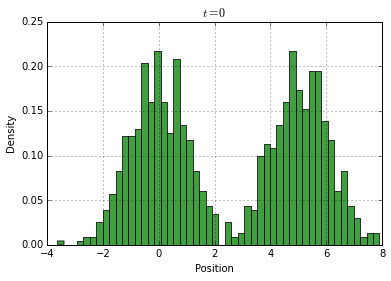

In [101]:
plt.hist(particle, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=0$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)


Now lets move forward time by a bit!

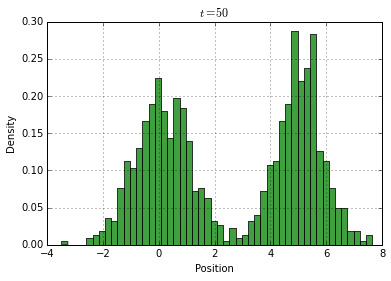

In [102]:
plt.hist(nbody_np(particle, particlev,20)[0], 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=20$')

plt.grid(True)

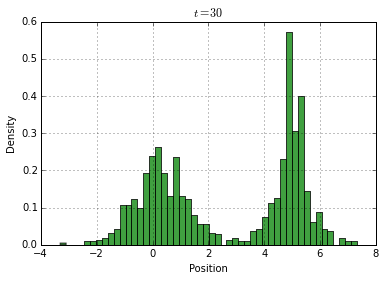

In [103]:
plt.hist(nbody_np(particle, particlev,30)[0], 50, normed=1, facecolor='green', alpha=0.75)


plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=30$')

plt.grid(True)

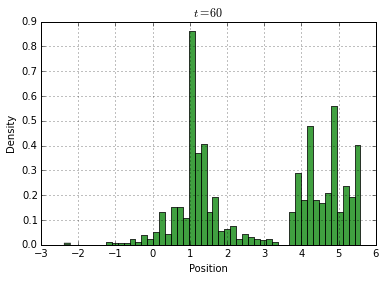

In [105]:
plt.hist(nbody_np(particle, particlev,60)[0], 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=60$')
plt.grid(True)


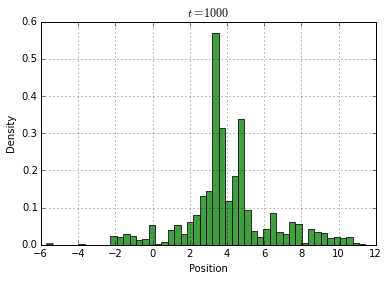

In [111]:
plt.hist(nbody_np(particle, particlev,2000)[0], 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=2000$')
plt.grid(True)

Now, we can turn on dark energy in our model and see how it affects the physics!

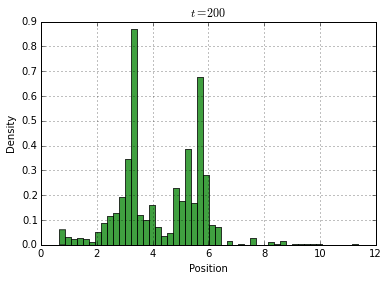

In [110]:
plt.hist(nbody_np(particle, particlev,2000,DarkEnergy=5)[0], 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title(r'$t=2000$ w/ dark energy')
plt.grid(True)

Questions:

    1) Sketch the two gaussian example as it changes with time. How do the peaks change with time? What would this mean in three spatial dimensions?

    2) If these were hydrogen gas particles, what would we see happening at the peaks of the density distribution?

    3) For the example given above, how might one define the size of a void? How does the size of the void change over time?

    4) What physics haven't we been including so far into the analysis? How might including this physics change the result qualitatively? 

    5) How might one quantify the increased "pokey"-ness of the distribution? How would this quantity change over time? (Note in cosmology we often talk about the parameter Sigma8 to define this pokeyness)
    
    6) In some cases you'll see a single overdensities which is subdivided into "sub"-overdensities. What would this correspond to in the real universe?

Problems:

_Turning on Dark Energy!_

I included a "dark energy model" in the simulation you can turn on by calling the nbody code as:

    nbody_np(particle, particlev,2000,DarkEnergy=[VALUE])[0]
    
In general the [VALUE] should be between 0.1 and 1000 to get reasonable results. Since we are doing things in one dimension with a very small particle number, it is hard to relate this directly to real physical quantities, but qualitatively it should be realistic.

    1) Look at late times (t>2000) with and without dark energy but with the same initial condition. How does the size of overdense regions change? How does the size of voids change?

    2) Try to decipher the code; how did we add dark energy? What does this mean in a physical sense?

    3) What would it mean if we give dark energy a negative value?

_Other Intial Conditions_

The universe didn't start as two Gaussians... but instead a field set by inflation. Some examples to play around with:

random field

    particle = np.random.random((nParticles, ndim))*10

uniform field

    particle =np.random.uniform(0,10,size = (nParticles,ndim))

Look online here for some more if you are interested! http://docs.scipy.org/doc/numpy/reference/routines.random.html

Run your simulation a number of times (you will need to rerun the initial condition code each time), each time note the number of overdense clumps, and the lengths between them. (However you define the overdense clumps, be consistent!) Take the measurements at fairly late times. Try to run it at least 4 times.

    1) How consistent are your results? What might be the reason for the spread?

    2) Rerun the same experiment but set the dark energy to be equal to 1. What spread do you find now?

    3) Rerun the experiment with dark energy equal to 5. What spread do you find now?

    4) Try to explain the effects in terms of physics we know! 
    
    5) What happens when we turn dark energy up unreasonably high? What does this correspond to?

_Sigma8_

A key cosmological parameter is sigma8, the standard deviation of the density field within 8 MpC. How might one try to implement this into our code? "Diagram out" the code you might add. As a challenge, actually write the code!

In [133]:
particle =np.random.uniform(0,10,size = (nParticles,ndim)) #uniform distribution sample